# ZOMATO-API PROJECT

# Importing Libraries

In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Path to the Dataset

In [2]:
path='../input/zomato-restaurants-data/zomato.csv'

# Initial View for inference

In [3]:
#initial View Of the data set
df=pd.read_csv(path,encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Question 1
### The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

## Part 1: Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


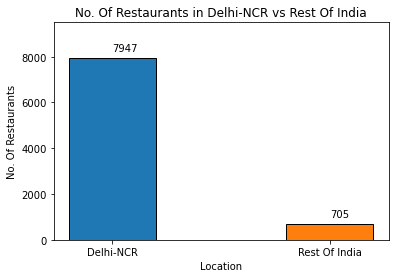

In [4]:
# Refining the city names in Country India
def changeCity(city):
    if city=='New Delhi'or city=='Ghaziabad' or city=='Noida' or city=='Gurgaon' or city=='Faridabad':
        return 'Delhi-NCR'
    else:
        return 'Rest Of India'
df.City[df['Country Code']==1]=df.City[df['Country Code']==1].apply(changeCity)
# Counting the restaurants having location Delhi-NCR
restaurants_delhi=df.City[df['City']=='Delhi-NCR'].count()
# Counting the restaurants having location Rest Of India
restaurants_other=df.City[df['City']=='Rest Of India'].count()
# Plotting the graph
plt.title('No. Of Restaurants in Delhi-NCR vs Rest Of India')
plt.xlabel('Location')
plt.ylabel('No. Of Restaurants')
plt.bar(height=restaurants_delhi,x='Delhi-NCR',width=0.4,edgecolor='black')
plt.bar(height=restaurants_other,x='Rest Of India',width=0.4,edgecolor='black')
plt.text(x='Delhi-NCR', y=restaurants_delhi+300,s=restaurants_delhi)
plt.text(x='Rest Of India',y=restaurants_other+300,s=restaurants_other)
plt.ylim(0,9500)
plt.show()

## Part 2 : Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [5]:
# Aggregating Cuisines of Delhi-NCR
delhi_cuisines=df.Cuisines[df['City']=='Delhi-NCR']
# Aggregating Cuisines of Rest Of India
rest_cuisines=df.Cuisines[df['City']=='Rest Of India']
delhi_dict={}
# Cuisine Values are Comma seperated
for i in delhi_cuisines.values:
    # Making array of different values
    array=i.strip().split(",")
    # Adding Unique values to the dictionary 
    for ele in array:
        if ele.strip() in delhi_dict:
            delhi_dict[ele.strip()]+=1
        else:
            delhi_dict[ele.strip()]=1
rest_dict={}
# Doing the same procedure for Rest Of India
for i in rest_cuisines.values:
    array=i.strip().split(",")
    for ele in array:
        if ele.strip() in rest_dict:
            rest_dict[ele.strip()]+=1
        else:
            rest_dict[ele.strip()]=1
# Converting the keys of dictionary to a set
a1=delhi_dict.keys()
a2=rest_dict.keys()
a1=set(a1)
a2=set(a2)
# Taking difference Of sets to get cuisines not present in Delhi-NCR but in Rest Of India
print('Cuisines which are not present in Delhi-NCR but in Rest Of India according to the data-set')
final=list(a2-a1)
print(*final)
# Checking all the cuisines with Zomato-API
import requests as req
# Required Header to be passed in the get request (Accn to the documentation)
h={
    'Accept':'application/json',
    'user-key':'11caaee84b90b16fe8fdb958bf8db957'
}
# Parameters
p={
    # City ID of Delhi-NCR is 1
    'city_id':1
}
# Get Request
res=req.get('https://developers.zomato.com/api/v2.1/cuisines',headers=h,params=p)
data=res.json()
api_cuisine_array=[]
# Creating the cuisine array from receieved data 

for i in data['cuisines']:
    api_cuisine_array.append(i['cuisine']['cuisine_name'])
print('Cuisines which are not present in Delhi-NCR but in Rest Of India according to Zomato API')
api_cuisine_array=set(api_cuisine_array)
print(*list(set(final)-api_cuisine_array.intersection(set(final))))

Cuisines which are not present in Delhi-NCR but in Rest Of India according to the data-set
BBQ Cajun German Malwani
Cuisines which are not present in Delhi-NCR but in Rest Of India according to Zomato API
Cajun German


# Question 1 Part 3
## Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.


   Cuisine Type  Number Of Restaurants
0  North Indian                   3597
1       Chinese                   2448
2     Fast Food                   1866
3       Mughlai                    933
4        Bakery                    697
5  South Indian                    569
6   Continental                    547
7      Desserts                    542
8   Street Food                    538
9       Italian                    535

   Cuisine Type  Number Of Restaurants
0  North Indian                    349
1       Chinese                    242
2   Continental                    177
3       Italian                    147
4          Cafe                    136
5     Fast Food                     97
6  South Indian                     62
7       Mughlai                     59
8      Desserts                     55
9       Mexican                     50


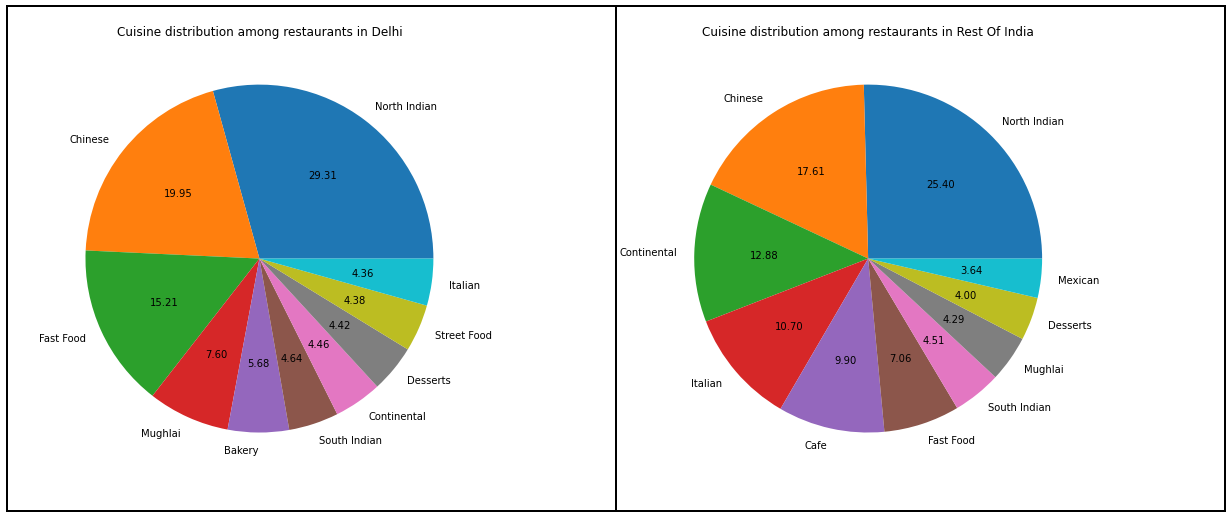

In [6]:
from pylab import *
# Sort Cuisines based on no of restaurants in Delhi-NCR
max_delhi=sorted(delhi_dict,key=delhi_dict.get,reverse=True)
print()
delhi=pd.DataFrame(((max_delhi[i],delhi_dict[max_delhi[i]]) for i in range(10)),columns=['Cuisine Type','Number Of Restaurants'])
print(delhi)
# Sort Cuisines based on no of restaurants in Rest Of India
max_rest=sorted(rest_dict,key=rest_dict.get,reverse=True)
print()
rest=pd.DataFrame(((max_rest[i],rest_dict[max_rest[i]]) for i in range(10)),columns=['Cuisine Type','Number Of Restaurants'])
print(rest)
# plotting the pie chart
# dividing the graph into two subplots
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
axs[0].pie(x=delhi['Number Of Restaurants'],labels=delhi['Cuisine Type'],autopct="%.2f")
axs[1].pie(x=rest['Number Of Restaurants'],labels=rest['Cuisine Type'],autopct="%.2f")
axs[0].title.set_text('Cuisine distribution among restaurants in Delhi')
axs[1].title.set_text('Cuisine distribution among restaurants in Rest Of India')
autoAxis = axs[0].axis()
# Creating borders around the pie charts
rec = Rectangle((autoAxis[0]-0.2,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=2)
rec = axs[0].add_patch(rec)
rec.set_clip_on(False)
autoAxis = axs[1].axis()
rec = Rectangle((autoAxis[0]-0.2,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=2)
rec = axs[1].add_patch(rec)
rec.set_clip_on(False)
plt.show()

## Part 4:Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

Top Cuisines serverd in Delhi NCR
 
 
   Cuisine Type  Number Of Restaurants
0  North Indian                   3597
1       Chinese                   2448
2     Fast Food                   1866
3       Mughlai                    933
4        Bakery                    697
5  South Indian                    569
6   Continental                    547
7      Desserts                    542
8   Street Food                    538
9       Italian                    535 

Top Cuisines serverd in Rest Of India 
 
 
   Cuisine Type  Number Of Restaurants
0  North Indian                    349
1       Chinese                    242
2   Continental                    177
3       Italian                    147
4          Cafe                    136
5     Fast Food                     97
6  South Indian                     62
7       Mughlai                     59
8      Desserts                     55
9       Mexican                     50 



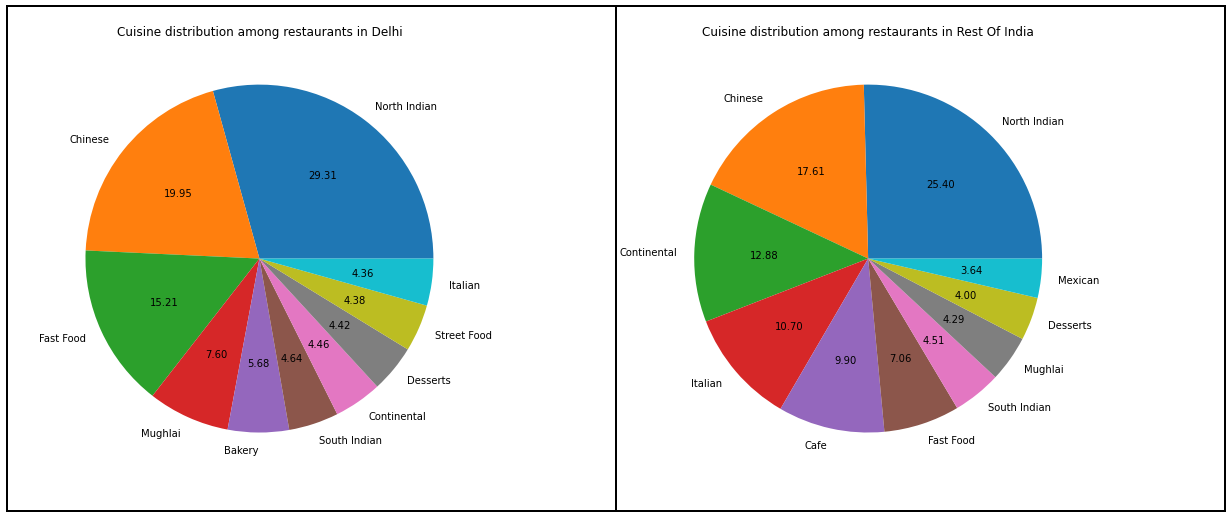

In [7]:
print("Top Cuisines serverd in Delhi NCR\n \n ")
print(delhi,"\n")
print("Top Cuisines serverd in Rest Of India \n \n ")
print(rest,"\n")
# plotting the pie chart
# dividing the graph into two subplots
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
axs[0].pie(x=delhi['Number Of Restaurants'],labels=delhi['Cuisine Type'],autopct="%.2f")
axs[1].pie(x=rest['Number Of Restaurants'],labels=rest['Cuisine Type'],autopct="%.2f")
axs[0].title.set_text('Cuisine distribution among restaurants in Delhi')
axs[1].title.set_text('Cuisine distribution among restaurants in Rest Of India')
autoAxis = axs[0].axis()
# Creating borders around the pie charts
rec = Rectangle((autoAxis[0]-0.2,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=2)
rec = axs[0].add_patch(rec)
rec.set_clip_on(False)
autoAxis = axs[1].axis()
rec = Rectangle((autoAxis[0]-0.2,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=2)
rec = axs[1].add_patch(rec)
rec.set_clip_on(False)
plt.show()

# Question 2
## User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

## Part 1 : Number of Votes for a given Restaurant

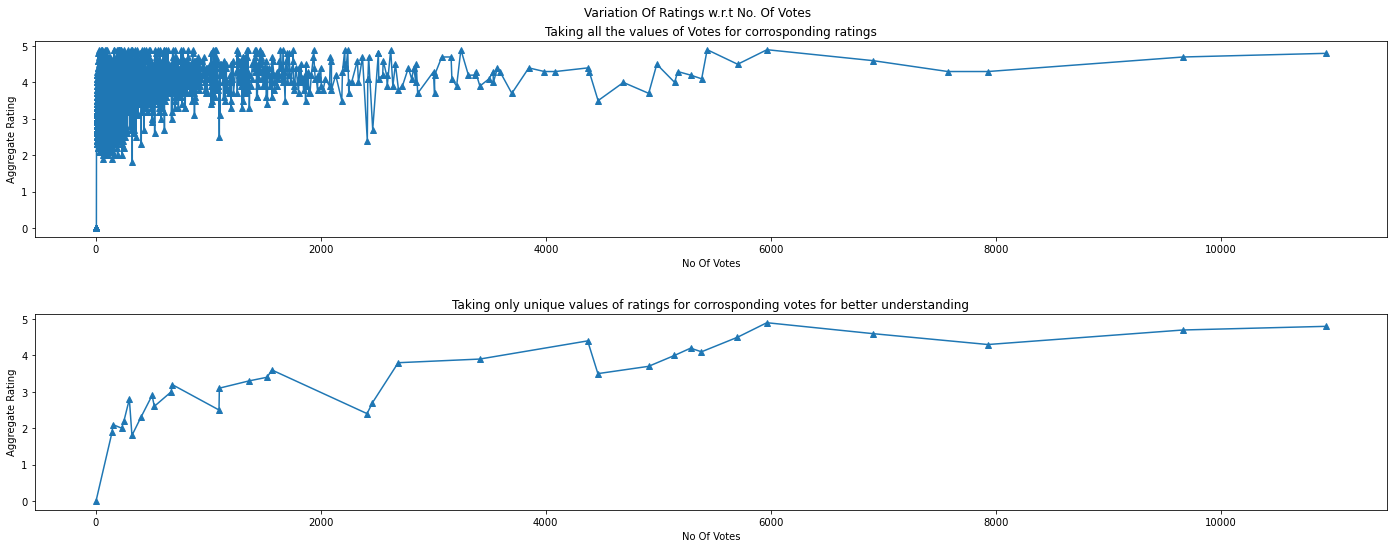

In [8]:
# Sorting the DataFrame by votes
df.sort_values(by='Votes',inplace=True,ascending=False)
ratings=df['Aggregate rating'].values
votes=df['Votes'].values
main_rating=[]
main_votes=[]
# Taking out Unique rating Values for corrosponding votes for better understanding
for i in range (len(ratings)):
    if ratings[i] not in main_rating:
        main_rating.append(ratings[i])
        main_votes.append(votes[i]) 
# Making Two Graphs to show the variation clearly
fig,axs=plt.subplots(2,figsize=(20,8))
fig.suptitle('Variation Of Ratings w.r.t No. Of Votes')
axs[0].plot(votes,ratings,marker='^')
axs[0].title.set_text('Taking all the values of Votes for corrosponding ratings')
axs[1].plot(main_votes,main_rating,marker='^')
axs[1].title.set_text('Taking only unique values of ratings for corrosponding votes for better understanding')
axs[0].set_xlabel('No Of Votes')
axs[0].set_ylabel('Aggregate Rating')
axs[1].set_xlabel('No Of Votes')
axs[1].set_ylabel('Aggregate Rating')
fig.tight_layout(pad=3.0)
plt.show()


## Part 2 : Restaurant serving more number of cuisines.

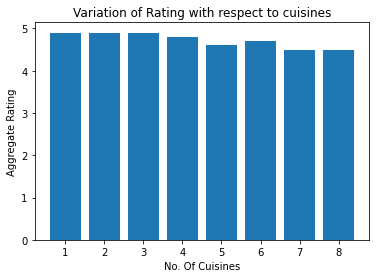

In [9]:
# Function to count no of cuisines in a particular restaurant
def count_cuisine(string):
    array=str(string).split(',')
    return len(array)
# applying the function
df['No._Of_Cuisine']=df['Cuisines'].apply(count_cuisine)
# plotting the bar graph
plt.bar(height=df['Aggregate rating'],x=df['No._Of_Cuisine'])
plt.title('Variation of Rating with respect to cuisines')
plt.ylabel('Aggregate Rating')
plt.xlabel('No. Of Cuisines')
plt.show()

## Part 3: Average Cost of Restaurant

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


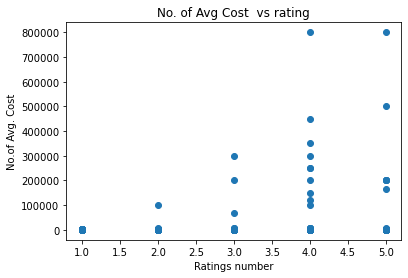

In [10]:

#as we know that country code of india is 1
data=df[df['Country Code']==1]
data=df[["Average Cost for two","Aggregate rating","Rating color"]]
data.dropna(inplace=True)
x=[1,2,3,4,5]
color=['Red', 'Orange', 'Yellow', 'Green', 'Dark Green']
x_axis=[]
y_axis=[]
for i in data.values:
    if i[2] !="White":
        x_axis.append(x[color.index(i[2])])
        y_axis.append(i[0])
plt.scatter(x_axis,y_axis)
plt.xlabel("Ratings number")
plt.ylabel("No.of Avg. Cost")
plt.title("No. of Avg Cost  vs rating")
plt.show()

## Part 4 : Restaurant Serving some more specefic cuisine

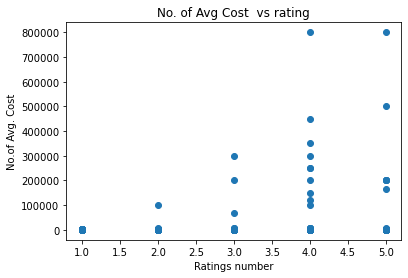

Cuisines which are Serverd in more specefic restaurants
Peranakan, Indonesian Irish Malwani, North Indian, Chinese, Seafood Gourmet Fast Food, Burger


In [11]:
# make a cuisine dictionary
cuisine_dict={}
df['Cuisines'].dropna(inplace=True)
for i in df.Cuisines:
    # create array of csv
    i=str(i)
    array=i.strip().split(',')
    # for each value add it to the dictionary
    for c in array:
        if c.strip() in cuisine_dict:
            cuisine_dict[c.strip()]+=1
        else:
            cuisine_dict[c.strip()]=1
sorted_values=sorted(cuisine_dict,key=cuisine_dict.get)[0:10]
rating_array=[]
restaurant_array=[]
cuisine_array=[]
sorted_values=set(sorted_values)
for i in df[['Cuisines','Restaurant Name','Aggregate rating']].values:
    i[0]=str(i[0])
    cuisines=set(i[0].strip().split(','))
    if len(list(sorted_values.intersection(cuisines)))>0:
        restaurant_array.append(i[1])
        rating_array.append(i[2])
        cuisine_array.append(i[0])

plt.scatter(x_axis,y_axis)
plt.xlabel("Ratings number")
plt.ylabel("No.of Avg. Cost")
plt.title("No. of Avg Cost  vs rating")
plt.show()
print("Cuisines which are Serverd in more specefic restaurants") 
print(*cuisine_array)


## Pat 2 :Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
# Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [12]:
# Gouping data of Indian localities
grouped_a=df[df['Country Code']==1].groupby('Locality')
locality_dict={}

for key,item in grouped_a:

    total_votes=item['Votes'].sum()
    w=(item['Votes']*item['Aggregate rating']).sum()
    ans=w/total_votes
    locality_dict[key]=ans.round(3)
top_values=sorted(locality_dict,key=locality_dict.get,reverse=True)[0:10]
print("----------------------------------------------------")
print("  Weighted User Rating for Localities in India")
print("----------------------------------------------------")
for i in top_values:
    print("| {:37s} | {:3f} |".format(i,locality_dict[i]))
    print("----------------------------------------------------")
# Gouping data of All localities
grouped=df.groupby('Locality')
locality_dict={}
print()
for key,item in grouped:
    total_votes=item['Votes'].sum()
    w=(item['Votes']*item['Aggregate rating']).sum()
    ans=w/total_votes
    locality_dict[key]=ans.round(3)
top_values=sorted(locality_dict,key=locality_dict.get,reverse=True)[0:10]
print("---------------------------------------------------------")
print("  Weighted User Rating for Localities All over the world")
print("---------------------------------------------------------")
for i in top_values:
    print("| {:42s} | {:3f} |".format(i,locality_dict[i]))
    print("---------------------------------------------------------")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


----------------------------------------------------
  Weighted User Rating for Localities in India
----------------------------------------------------
| Aminabad                              | 4.900000 |
----------------------------------------------------
| Hotel Clarks Amer, Malviya Nagar      | 4.900000 |
----------------------------------------------------
| Friends Colony                        | 4.887000 |
----------------------------------------------------
| Arambol                               | 4.600000 |
----------------------------------------------------
| Gandhipuram                           | 4.600000 |
----------------------------------------------------
| Anjuna                                | 4.545000 |
----------------------------------------------------
| Acropolis Mall, Kasba                 | 4.385000 |
----------------------------------------------------
| Arera Colony                          | 4.385000 |
----------------------------------------------------

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


---------------------------------------------------------
  Weighted User Rating for Localities All over the world
---------------------------------------------------------
| Aminabad                                   | 4.900000 |
---------------------------------------------------------
| Caddebostan                                | 4.900000 |
---------------------------------------------------------
| Cengkareng                                 | 4.900000 |
---------------------------------------------------------
| City and Suburban                          | 4.900000 |
---------------------------------------------------------
| DIFC                                       | 4.900000 |
---------------------------------------------------------
| Deira City Centre Area                     | 4.900000 |
---------------------------------------------------------
| Fort Street                                | 4.900000 |
---------------------------------------------------------
| Friends Colon

# Visualization

## Part 1:Plot the bar graph top 15 restaurants have a maximum number of outlets.

-----------------------------------------------
  Restaurants Having Highest Number Of Outlets
-----------------------------------------------
| Restaurant Name      | No. Of Outlets |
-----------------------------------------
| Cafe Coffee Day      |         83     |
-----------------------------------------
| Domino's Pizza       |         79     |
-----------------------------------------
| Subway               |         63     |
-----------------------------------------
| Giani                |         51     |
-----------------------------------------
| Green Chick Chop     |         51     |
-----------------------------------------
| McDonald's           |         48     |
-----------------------------------------
| Keventers            |         34     |
-----------------------------------------
| Pizza Hut            |         30     |
-----------------------------------------
| Baskin Robbins       |         28     |
-----------------------------------------
| Barbeque Nation

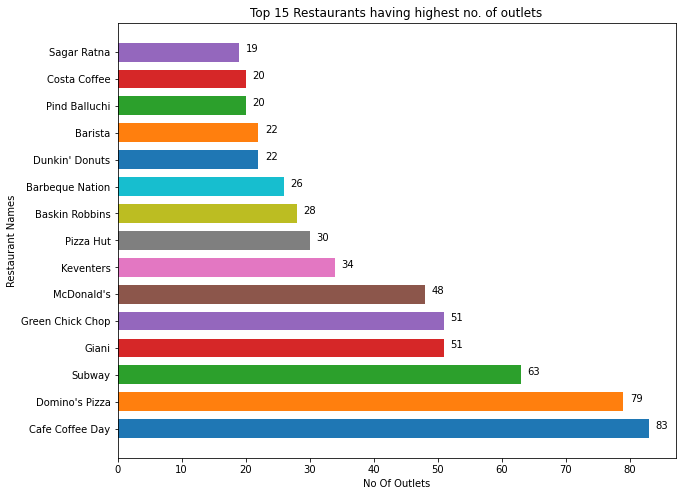

In [13]:
# Handling Duplicate values of Restaurant Names
df['Restaurant Name']=df['Restaurant Name'].replace("Giani's","Giani")
# Dropping NaN values
df['Restaurant Name'].dropna(inplace=True)
restaurant_names=df['Restaurant Name']
r_dict={}
# Creating the no. of outlets dictionary
for i in restaurant_names:
    if i in r_dict:
        r_dict[i]+=1
    else:
        r_dict[i]=1
plt.figure(figsize=(10,8))
# Sorting the values on the basis of no of outlets
outlets_sorted=sorted(r_dict,key=r_dict.get,reverse=True)[0:15]
print("-----------------------------------------------")
print("  Restaurants Having Highest Number Of Outlets")
print("-----------------------------------------------")
print("| {:20s} | {:14s} |".format('Restaurant Name','No. Of Outlets'))
print("-----------------------------------------")
for i in outlets_sorted:
    print("| {:20s} | {:10d}     |".format(i,r_dict[i]))
    print("-----------------------------------------")
    # Plotting the graph
    plt.barh(width=r_dict[i],y=i,height=0.7)
    plt.text(y=i,x=r_dict[i]+1,s=r_dict[i])
plt.title('Top 15 Restaurants having highest no. of outlets')

plt.xlabel('No Of Outlets')
plt.ylabel("Restaurant Names")
plt.show()

## Part 2: Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

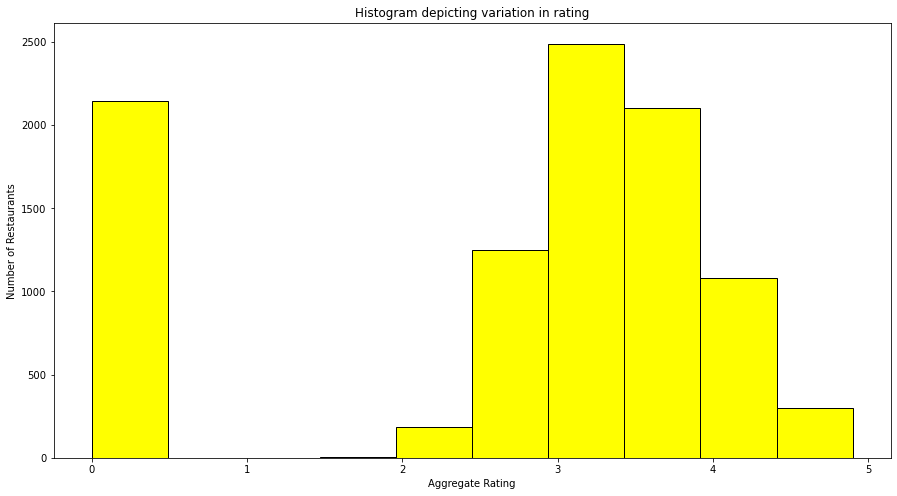

In [14]:
# Initializing the figure
plt.figure(figsize=(15,8))
# Plot title
plt.title('Histogram depicting variation in rating')
# Removing NaN values from ratings (Dropping unrated restaurants)
df['Aggregate rating'].dropna(inplace=True)
# plotting the histogram
plt.hist(x=df['Aggregate rating'],edgecolor='black',color='yellow')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

# Part 3:Plot the bar graph top 10 restaurants in the data with the highest number of votes.

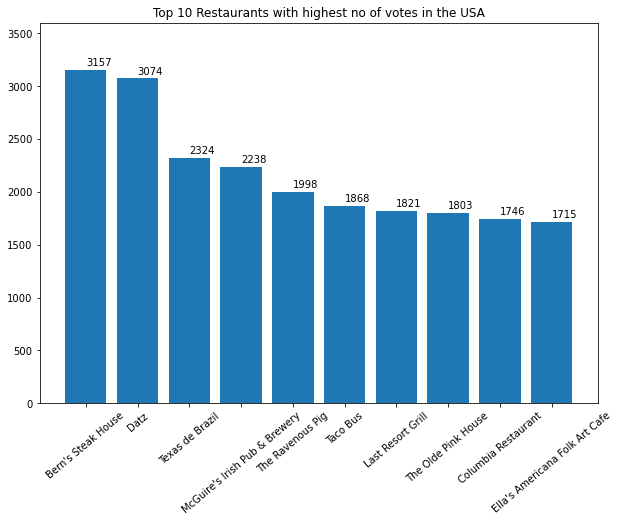

In [15]:
# Extracting Votes and Restaurant names from dataset having country USA (Code :216)
votes=df[['Votes','Restaurant Name']][df['Country Code']==216]
# Sorting values on the basis of votes
votes.sort_values(by='Votes',ascending=False,inplace=True)
# Taking top 10 Values
ans=votes[['Restaurant Name','Votes']][0:10].values
# Initializing the figure
plt.figure(figsize=(10,7))
# Plot title
plt.title("Top 10 Restaurants with highest no of votes in the USA")
# Plotting the graph
plt.bar(height=votes['Votes'][0:10],x=votes['Restaurant Name'][0:10])
for i in votes.values[0:10]:
    plt.text(i[1],i[0]+40,i[0])
plt.xticks(rotation=40)
plt.ylim(0,3600)
plt.show()


# Part 4:Plot the pie graph of top 10 cuisines present in restaurants in the USA.

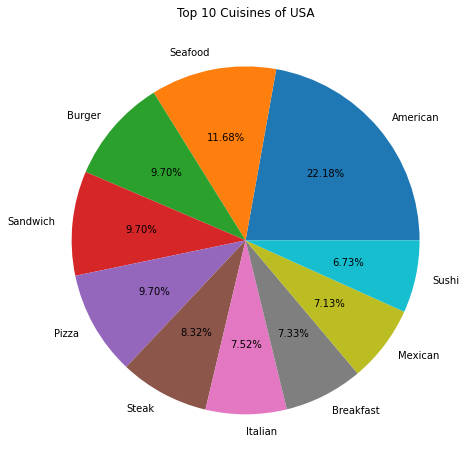

In [16]:
# Extracting Cuisine names and restaurant names having country USA
table=df[['Cuisines','Restaurant Name']][df['Country Code']==216]
us_cuisines={}
# Creating The dictionary
for i in table['Cuisines']:
    i=str(i)
    array=i.strip().split(',')
    for a in array:
        if a.strip() in us_cuisines:
            us_cuisines[a.strip()]+=1
        else:
            us_cuisines[a.strip()]=1
# Sorting the values
sorted_values=sorted(us_cuisines,key=us_cuisines.get,reverse=True)[0:10]
size_array=[]
# Taking it in an array
for i in sorted_values:
    size_array.append(us_cuisines[i])
# Plotting the graph
plt.figure(figsize=(8,8))
plt.title("Top 10 Cuisines of USA")
plt.pie(size_array,labels=sorted_values,autopct="%.2f%%")
plt.show()

## Part 5:Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

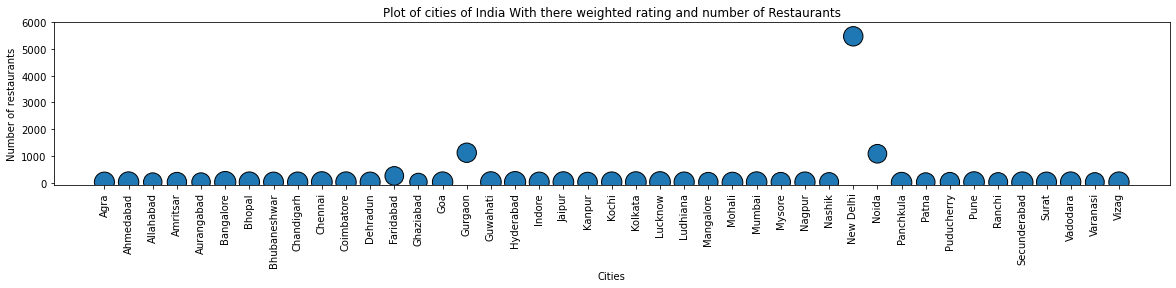

In [17]:
dataf=pd.read_csv(path,encoding='latin-1')
# grouping by cities
city_grouped=dataf[dataf['Country Code']==1].groupby('City')
cities=[]
num_restaurants=[]
weighted_rating=[]
# Creating different arrays from dataframe
for key,item in city_grouped:
    total_votes=item['Votes'].sum()
    w=(item['Votes']*item['Aggregate rating']).sum()
    ans=w/total_votes
    weighted_rating.append(ans)
    num_restaurants.append(len(item))
    cities.append(key)
# plotting the graph
plt.figure(figsize=(20,3))
weighted_rating=np.array(weighted_rating)
# Increasing values of Weighted rating for visibility of Bubbles
weighted_rating*=100
plt.title("Plot of cities of India With there weighted rating and number of Restaurants")
plt.scatter(cities, num_restaurants, s=weighted_rating, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Number of restaurants')
plt.ylim(-100,6000)
plt.show()